In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [2]:
df_tele = pd.read_csv("telematik_agg_v2.csv", index_col=0)
df_tele = df_tele.drop(columns=["Unnamed: 0.1", "driving_skill"])

In [3]:
df_tele.head()

,DrivAge,rel_risk,Mileage,max_accel_x,min_accel_x,max_accel_y,min_accel_y,max_speed_mw,max_speed_urban,max_speed_rural,ratio_mw,ratio_urban,ratio_rural,ratio_night,ratio_precip,ratio_rush,four_accel_1,four_accel_2,four_accel_3,four_accel_4
0,52,0.025511,6235.337875,4.270571,-3.186554,2.236002,-1.696633,139.580307,131.528249,55.806158,0.147900,0.234289,0.617811,0.159878,0.182537,0.065222,2.470029,0.000814,82.928661,3782.818447
1,38,0.093298,2520.900336,1.787043,-3.118378,2.129723,-1.241005,157.229086,136.481766,58.827611,0.158301,0.348099,0.493600,0.162678,0.153850,0.138712,-3.454407,0.404569,30.738335,496.235516
2,44,0.119460,14136.719210,4.403333,-3.074536,2.512433,-1.387016,166.693425,136.615064,61.657666,0.133120,0.226000,0.640880,0.161343,0.200200,0.180049,-25.788232,3.060334,157.741334,3917.657266
3,32,0.023914,7718.314400,0.481826,-3.012558,1.783253,-2.248576,136.874746,131.570166,56.072814,0.155843,0.225024,0.619133,0.151244,0.165610,0.365876,2.066236,79.250061,174.778169,2958.453923
4,73,0.108091,3495.908846,14.967886,-2.792939,2.182035,-1.979150,164.069706,135.150505,60.160611,0.154932,0.196956,0.648112,0.156745,0.114058,0.000403,10.282886,0.000067,28.245054,792.581652


In [4]:
X = df_tele.drop(columns="rel_risk")
y = df_tele["rel_risk"]

## XGBoost

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_test

,DrivAge,Mileage,max_accel_x,min_accel_x,max_accel_y,min_accel_y,max_speed_mw,max_speed_urban,max_speed_rural,ratio_mw,ratio_urban,ratio_rural,ratio_night,ratio_precip,ratio_rush,four_accel_1,four_accel_2,four_accel_3,four_accel_4
91116,54,12934.994178,7.574136,-2.981652,2.159651,-2.318382,140.321381,131.363402,56.216986,0.151187,0.173366,0.675447,0.145293,0.185568,0.400577,-0.992819,0.001013,111.261069,4000.000000
73417,45,6229.946821,6.307796,-2.989856,2.201380,-2.098963,137.307970,131.685651,56.153531,0.152963,0.275752,0.571285,0.155604,0.153812,0.091753,0.183845,31.565611,57.528088,3933.217854
36181,49,4599.761151,10.116597,-3.114578,2.066748,-1.777048,131.367220,130.363944,55.163977,0.145230,0.250877,0.603892,0.167405,0.118890,0.016278,0.282411,0.000013,6.282475,302.372941
88479,19,6811.378637,8.101726,-2.884798,1.817066,-1.570373,136.997666,131.216867,55.803793,0.158224,0.252675,0.589101,0.158700,0.129907,0.203361,5.154732,41.792183,91.062749,205.698384
8155,22,11207.491688,6.090091,-2.830061,2.085256,-1.586312,131.070335,130.379479,55.310876,0.144735,0.347441,0.507825,0.153499,0.164571,0.286887,0.987531,3.881564,79.469502,1657.890448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118670,21,3571.031061,8.282133,-3.179068,1.749637,-2.080488,133.346940,130.594268,55.527500,0.164655,0.280782,0.554563,0.146922,0.175932,0.305780,1.495198,0.000088,22.436051,825.124481
51439,28,7890.798380,3.630364,-3.005780,1.826259,-1.621483,133.339925,130.769336,55.315926,0.143377,0.210224,0.646399,0.154128,0.122361,0.087548,1.142360,2.357429,41.147061,459.617357
91433,53,5347.807280,4.825897,-2.985801,2.098325,-1.901649,146.419202,132.880896,57.413028,0.152838,0.309897,0.537265,0.142854,0.141795,0.203756,22.025050,47.216452,216.366181,214.518863
82917,44,10839.448323,5.732763,-2.863666,1.972249,-1.999106,134.314958,131.120716,55.792346,0.154023,0.283011,0.562966,0.164059,0.174991,0.325963,0.222336,0.006991,121.847328,2716.490224


In [7]:
modelxgb = xgb.XGBRegressor(
    n_estimators=100, learning_rate=0.1, use_label_encoder=False, random_state=0
)

In [8]:
modelxgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [9]:
modelxgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=None)

In [10]:
predxgb = modelxgb.predict(X_test)

In [11]:
predxgb_sort = np.sort(predxgb)

## Linear Model

In [12]:
modelreg = linear_model.LinearRegression()

In [13]:
modelreg.fit(X_train, y_train)

LinearRegression()

In [14]:
predreg = modelreg.predict(X_test)

In [15]:
predreg_sort = np.sort(predreg)

## Lorenz Curve / Gini-Koeffizient

In [16]:
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

In [17]:
def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

In [18]:
lorenz_curve = lorenz(predxgb_sort)

In [19]:
gini(predxgb)

0.001555350019700974

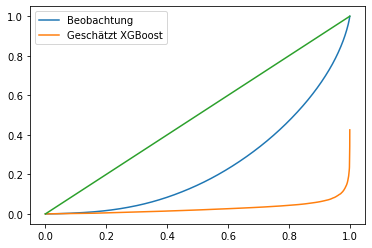

In [20]:
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, label="Beobachtung")
plt.plot(
    np.linspace(0.0, 1.0, predxgb_sort.size), predxgb_sort, label="Geschätzt XGBoost"
)
plt.plot([0, 1], [0, 1])
plt.legend()
plt.show()

## Marginalverteilungsplot

In [21]:
df_mileage = X_test.drop(columns=X_test[X_test.columns.difference(["Mileage"])])

In [22]:
df_mileage["observation"] = y_test

In [23]:
df_mileage["predxgb"] = predxgb

In [24]:
df_mileage["predreg"] = predreg

In [25]:
df_mileage_sort = df_mileage.sort_values("Mileage")

In [26]:
df_mileage_sort

,Mileage,observation,predxgb,predreg
108923,0.000000,0.021595,0.023634,0.022923
109240,0.000000,0.006394,0.006448,0.006063
123093,0.000000,0.001433,0.001638,0.001744
64565,0.000000,0.008150,0.007103,0.006979
10007,0.000000,0.003421,0.004339,0.004027
...,...,...,...,...
14331,36227.724415,0.350009,0.340614,0.326503
22285,36692.107116,0.173699,0.204903,0.188901
18911,38289.428764,0.289909,0.260338,0.251404
105097,41853.710352,0.348520,0.425185,0.393103


In [27]:
df_mileage_sort.Mileage.describe()

count    27121.000000
mean      7156.463543
std       4462.664324
min          0.000000
25%       3921.277641
50%       6894.294682
75%       9992.022301
max      49816.528667
Name: Mileage, dtype: float64

In [28]:
bins_mileage = [0, 5000, 10000, 15000, 20000, 50000]

In [29]:
df_mileage_sort["bin"] = pd.cut(
    x=df_mileage_sort.Mileage,
    bins=bins_mileage,
    right=True,
    include_lowest=True,
    labels=["0-5000", "5001-10000", "10001-15000", "15001-20000", "20001-50000"],
)

In [30]:
df_mileage_sort

,Mileage,observation,predxgb,predreg,bin
108923,0.000000,0.021595,0.023634,0.022923,0-5000
109240,0.000000,0.006394,0.006448,0.006063,0-5000
123093,0.000000,0.001433,0.001638,0.001744,0-5000
64565,0.000000,0.008150,0.007103,0.006979,0-5000
10007,0.000000,0.003421,0.004339,0.004027,0-5000
...,...,...,...,...,...
14331,36227.724415,0.350009,0.340614,0.326503,20001-50000
22285,36692.107116,0.173699,0.204903,0.188901,20001-50000
18911,38289.428764,0.289909,0.260338,0.251404,20001-50000
105097,41853.710352,0.348520,0.425185,0.393103,20001-50000


In [31]:
df_avg = df_mileage_sort.groupby(df_mileage_sort.bin).mean()

In [32]:
df_avg

,Mileage,observation,predxgb,predreg
bin,,,,
0-5000,2439.838875,0.016939,0.016997,0.016799
5001-10000,7395.012250,0.024750,0.024777,0.024885
10001-15000,11969.619787,0.038872,0.038953,0.039130
15001-20000,16785.398429,0.075803,0.075919,0.075578
20001-50000,23473.143419,0.168441,0.168726,0.166852


In [33]:
import matplotlib.pyplot as plt

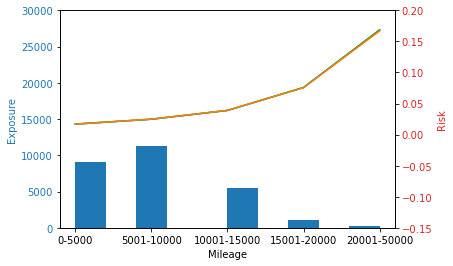

In [34]:
fig, ax1 = plt.subplots()

color = "tab:blue"
ax1.set_xlabel("Mileage")
ax1.set_ylabel("Exposure", color=color)
plt.hist(x=df_mileage_sort.bin, color=color)
ax1.tick_params(axis="y", labelcolor=color)
plt.ylim([0, 30000])
ax2 = ax1.twinx()

color2 = "tab:red"
colorxgb = "tab:green"
ax2.set_ylabel("Risk", color=color2)
plt.plot(df_avg.index, df_avg.observation)
plt.plot(df_avg.index, df_avg.predxgb, color=colorxgb)
plt.plot(df_avg.index, df_avg.predreg)
plt.ylim([-0.15, 0.2])
ax2.tick_params(axis="y", labelcolor=color2)

plt.show()

## Lift Plot

In [53]:
df_mileage_sort_quant = df_mileage_sort.drop(columns = "bin")
df_mileage_sort_quant

,Mileage,observation,predxgb,predreg
108923,0.000000,0.021595,0.023634,0.022923
109240,0.000000,0.006394,0.006448,0.006063
123093,0.000000,0.001433,0.001638,0.001744
64565,0.000000,0.008150,0.007103,0.006979
10007,0.000000,0.003421,0.004339,0.004027
...,...,...,...,...
14331,36227.724415,0.350009,0.340614,0.326503
22285,36692.107116,0.173699,0.204903,0.188901
18911,38289.428764,0.289909,0.260338,0.251404
105097,41853.710352,0.348520,0.425185,0.393103


In [107]:
df_mileage_sort_quant["bin"] = pd.qcut(
    x=df_mileage_sort_quant.Mileage,
    q=10,
    labels=range(0,10)
)

In [108]:
df_mileage_sort_quant

,Mileage,observation,predxgb,predreg,bin
108923,0.000000,0.021595,0.023634,0.022923,0
109240,0.000000,0.006394,0.006448,0.006063,0
123093,0.000000,0.001433,0.001638,0.001744,0
64565,0.000000,0.008150,0.007103,0.006979,0
10007,0.000000,0.003421,0.004339,0.004027,0
...,...,...,...,...,...
14331,36227.724415,0.350009,0.340614,0.326503,9
22285,36692.107116,0.173699,0.204903,0.188901,9
18911,38289.428764,0.289909,0.260338,0.251404,9
105097,41853.710352,0.348520,0.425185,0.393103,9


In [109]:
#df_mileage_sort_quant["bin"] = df_mileage_sort_quant["bin"].astype(str)

In [110]:
df_quant_avg = df_mileage_sort_quant.groupby(df_mileage_sort_quant.bin).mean()

In [111]:
df_quant_avg

,Mileage,observation,predxgb,predreg
bin,,,,
0,321.221894,0.014595,0.014671,0.014317
1,2316.370605,0.016886,0.016907,0.016752
2,3913.569414,0.018665,0.018726,0.018604
3,5210.681526,0.020066,0.020190,0.020165
4,6334.717588,0.022892,0.022841,0.022899
5,7453.277113,0.024791,0.024801,0.024946
6,8618.765236,0.026652,0.026648,0.026793
7,9989.959082,0.030389,0.030511,0.030730
8,11747.555709,0.037953,0.037989,0.038156


In [112]:
df_quant_avg = df_quant_avg.assign(fit_xgb = lambda x: x["observation"]*x["predxgb"]/x["predreg"])

In [113]:
df_quant_avg = df_quant_avg.assign(fit_reg = lambda x: x["observation"]*x["predreg"]/x["predxgb"])

In [114]:
df_quant_avg

,Mileage,observation,predxgb,predreg,fit_xgb,fit_reg
bin,,,,,,
0,321.221894,0.014595,0.014671,0.014317,0.014956,0.014243
1,2316.370605,0.016886,0.016907,0.016752,0.017043,0.016731
2,3913.569414,0.018665,0.018726,0.018604,0.018788,0.018543
3,5210.681526,0.020066,0.020190,0.020165,0.020090,0.020041
4,6334.717588,0.022892,0.022841,0.022899,0.022835,0.022950
5,7453.277113,0.024791,0.024801,0.024946,0.024647,0.024936
6,8618.765236,0.026652,0.026648,0.026793,0.026508,0.026796
7,9989.959082,0.030389,0.030511,0.030730,0.030172,0.030607
8,11747.555709,0.037953,0.037989,0.038156,0.037787,0.038119


In [1]:
fig, ax1 = plt.subplots()

color = "tab:blue"
ax1.set_xlabel("Mileage")
ax1.set_ylabel("Exposure", color=color)
plt.hist(x=df_mileage_sort_quant.bin, color=color)
ax1.tick_params(axis="y", labelcolor=color)
plt.ylim([0, 30000])
ax2 = ax1.twinx()

color2 = "tab:red"
colorxgb = "tab:green"
ax2.set_ylabel("Risk", color=color2)
plt.plot(df_quant_avg.index, df_quant_avg.observation)
plt.plot(df_quant_avg.index, df_quant_avg.fit_xgb, color=colorxgb)
plt.plot(df_quant_avg.index, df_quant_avg.fit_reg)
plt.ylim([-0.15, 0.2])
ax2.tick_params(axis="y", labelcolor=color2)

plt.show()

NameError: name 'plt' is not defined

## Liftplot: Max_Speed

In [70]:
df_speed = X_test.drop(columns=X_test[X_test.columns.difference(["max_speed_mw"])])

In [71]:
df_speed["observation"] = y_test

In [72]:
df_speed["predxgb"] = predxgb

In [73]:
df_speed["predreg"] = predreg

In [76]:
df_speed_sort = df_speed.sort_values("max_speed_mw")

In [77]:
df_speed_sort

,max_speed_mw,observation,predxgb,predreg
101368,129.999098,0.000104,0.000361,0.000392
130074,130.002528,0.000046,0.000371,0.000211
74877,130.003890,0.000120,0.000352,0.000848
60671,130.005011,0.000077,0.000376,0.000656
88359,130.007311,0.000094,0.000372,0.000742
...,...,...,...,...
91734,241.845623,0.419469,0.364321,0.368821
44186,242.062880,0.375892,0.370801,0.396379
15581,247.431886,0.282776,0.323883,0.325345
105097,248.695004,0.348520,0.425185,0.393103


In [79]:
df_speed_quant =df_speed_sort

In [93]:
df_speed_quant["bin"] = pd.qcut(
    x=df_speed_sort.max_speed_mw,
    q=5,
)

In [94]:
df_speed_quant

,max_speed_mw,observation,predxgb,predreg,bin
101368,129.999098,0.000104,0.000361,0.000392,"(129.998, 131.295]"
130074,130.002528,0.000046,0.000371,0.000211,"(129.998, 131.295]"
74877,130.003890,0.000120,0.000352,0.000848,"(129.998, 131.295]"
60671,130.005011,0.000077,0.000376,0.000656,"(129.998, 131.295]"
88359,130.007311,0.000094,0.000372,0.000742,"(129.998, 131.295]"
...,...,...,...,...,...
91734,241.845623,0.419469,0.364321,0.368821,"(141.679, 251.144]"
44186,242.062880,0.375892,0.370801,0.396379,"(141.679, 251.144]"
15581,247.431886,0.282776,0.323883,0.325345,"(141.679, 251.144]"
105097,248.695004,0.348520,0.425185,0.393103,"(141.679, 251.144]"


In [95]:
df_speed_quant["bin"] = df_speed_quant["bin"].astype(str)

In [96]:
df_speed_quant_avg = df_speed_quant.groupby(df_speed_quant.bin).mean()

In [97]:
df_speed_quant_avg 

,max_speed_mw,observation,predxgb,predreg
bin,,,,
"(129.998, 131.295]",130.593432,0.002413,0.002473,0.002801
"(131.295, 133.696]",132.418625,0.009892,0.009913,0.010042
"(133.696, 136.841]",135.191318,0.020911,0.020923,0.020760
"(136.841, 141.679]",139.021865,0.034281,0.034282,0.034034
"(141.679, 251.144]",150.648268,0.072607,0.072780,0.072679


In [98]:
df_speed_quant_avg = df_speed_quant_avg.assign(fit_xgb = lambda x: x["observation"]*x["predxgb"]/x["predreg"])

In [99]:
df_speed_quant_avg = df_speed_quant_avg.assign(fit_reg = lambda x: x["observation"]*x["predreg"]/x["predxgb"])

In [103]:
df_speed_quant_avg

,max_speed_mw,observation,predxgb,predreg,fit_xgb,fit_reg
bin,,,,,,
"(129.998, 131.295]",130.593432,0.002413,0.002473,0.002801,0.002130,0.002733
"(131.295, 133.696]",132.418625,0.009892,0.009913,0.010042,0.009766,0.010021
"(133.696, 136.841]",135.191318,0.020911,0.020923,0.020760,0.021075,0.020748
"(136.841, 141.679]",139.021865,0.034281,0.034282,0.034034,0.034531,0.034032
"(141.679, 251.144]",150.648268,0.072607,0.072780,0.072679,0.072708,0.072505


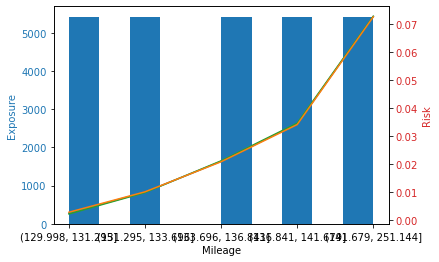

In [102]:
fig, ax1 = plt.subplots()

color = "tab:blue"
ax1.set_xlabel("Mileage")
ax1.set_ylabel("Exposure", color=color)
plt.hist(x=df_speed_quant.bin, color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax2 = ax1.twinx()

color2 = "tab:red"
colorxgb = "tab:green"
ax2.set_ylabel("Risk", color=color2)
plt.plot(df_speed_quant_avg.index, df_speed_quant_avg.observation)
plt.plot(df_speed_quant_avg.index, df_speed_quant_avg.fit_xgb, color=colorxgb)
plt.plot(df_speed_quant_avg.index, df_speed_quant_avg.fit_reg)

ax2.tick_params(axis="y", labelcolor=color2)

plt.show()